In [1]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from mpl_toolkits.basemap import Basemap
import numpy as np
from pylab import *

from wrf import to_np, getvar, smooth2d, get_basemap, latlon_coords,ALL_TIMES

C:\Users\WIN 10\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\WIN 10\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [6]:
# Open the NetCDF file
ncfile = Dataset("wrfoutd02_pbl99")
slp = getvar(ncfile,"LU_INDEX")

In [7]:
levels=np.arange(0,19,1)

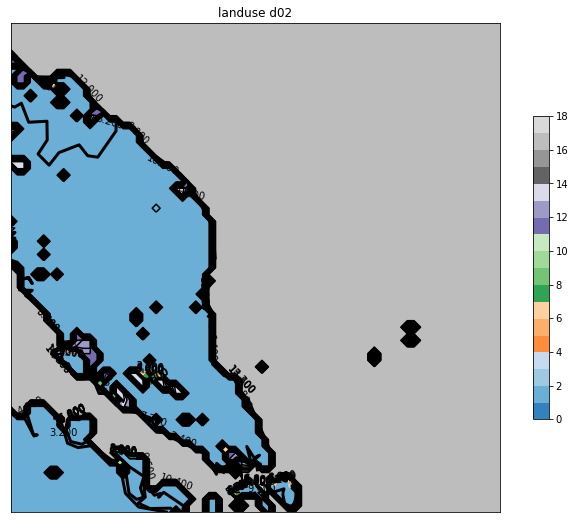

In [9]:
# Mendapatkan Landuse atau tutupan lahan
time=0
xx = int(time)
smooth_tc = getvar(ncfile, "LU_INDEX", timeidx=xx)

#ambil koordinat
lats, lons = latlon_coords(slp)

# Get the basemap object
bm = get_basemap(slp)

# Create a figure
fig = plt.figure(figsize=(12,9))

# Add geographic outlines
bm.drawcoastlines(linewidth=3)
bm.drawstates(linewidth=3)
bm.drawcountries(linewidth=3)

# Convert the lats and lons to x and y.  Make sure you convert the lats and lons to
# numpy arrays via to_np, or basemap crashes with an undefined RuntimeError.
x, y = bm(to_np(lons), to_np(lats))

# Draw the contours and filled contours
CS = bm.contour(x, y, to_np(smooth_tc), 20,colors="black")
plt.clabel(CS, inline=1, fontsize=10)
#plt.contour(to_np(lons), to_np(lats), to_np(ht_500), levels=levels, colors="black",
#                   transform=crs.PlateCarree())
bm.contourf(x, y, to_np(smooth_tc), 20, levels=levels,  cmap=get_cmap("tab20c"))
#plt.clabel(bcontour, inline=1, fontsize=10, fmt="%i")

# Add a color bar
#cbar=fig.colorbar(smooth_tc, ticks=[1000,1005,1010])
plt.colorbar(shrink=.62)

#plt.title("(99)moisture Flux ke " + str(xx))
plt.title("landuse d02")

plt.show()

#fig.savefig('pblh_d02_99_'+str(xx) +'.png')
fig.savefig('landuse d02.png')